<a href="https://colab.research.google.com/github/sanha-hwang/OpenCV_practrice/blob/main/OpenCVstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Open CV<H1>

-> 실시간 컴퓨터 비전을 목적, 실시간 이미지 프로세싱에 중점을 둔 한 프로그래밍 라이브러리   
-> 텐서플로우, 파이토치, 및 카페의 딥러닝 프레임워크 지원


<h3>**이미지와 색공간**</h3>   

0-255 사이의 값으로 밝기를 표현
color: 3차원( RGB의 비율 조합)
gray scale: 2차원 0~255의  값을 통해 **밝기**를 표현 

1. 이미지 파일 형식
  - BMP: 픽셀 데이터를 압축하지 않은 상태로 저장, 파일 구조 간단
하지만 용량이 매우 큼   

  - JPG(JPEG): 손실 압축 사용, 원본 영상으로부터 픽셀값이 미세하게 
달라짐, 파일 용량크기가 크게 감소하는 점에서 장점, 디지털 카메라   

  - GIF: 무손실압축, 움직이는 그림인 Animation GIF지원
256 이하의 색상을 가진 영상만을 저장하고, 화질이 매우 떨어짐   

  - **PNG**: Portable Network Graphics, 무손실 압축 사용, 용량은 큰편
이지만 픽셀값이 변경되지 않음, a채널을 지원하여 일부분을 투명하
게 설정 가능   


2. 이미지와 넘파이   

      이미지는 배열로 표현 가능

3. 이미지 읽기   

  - pillow, matplotlib, OpenCV 모두 가능
  - 구글코렙, 주피터 노트북과 같은 환경에서는 PL, matplotlib 더 적합
  - OpenCV는 주로 파이썬 스크립트 환경에서 사용
  - colab에서는 from google.colab.patches import cv2_imshow 이미지는 출력할 수 있지만 동영상 관련 처리는 NO



In [1]:
import cv2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO


<h2>이미지 출력1-plt</h2>

In [8]:
url ='https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'
response = requests.get(url)
pic = Image.open(BytesIO(response.content))

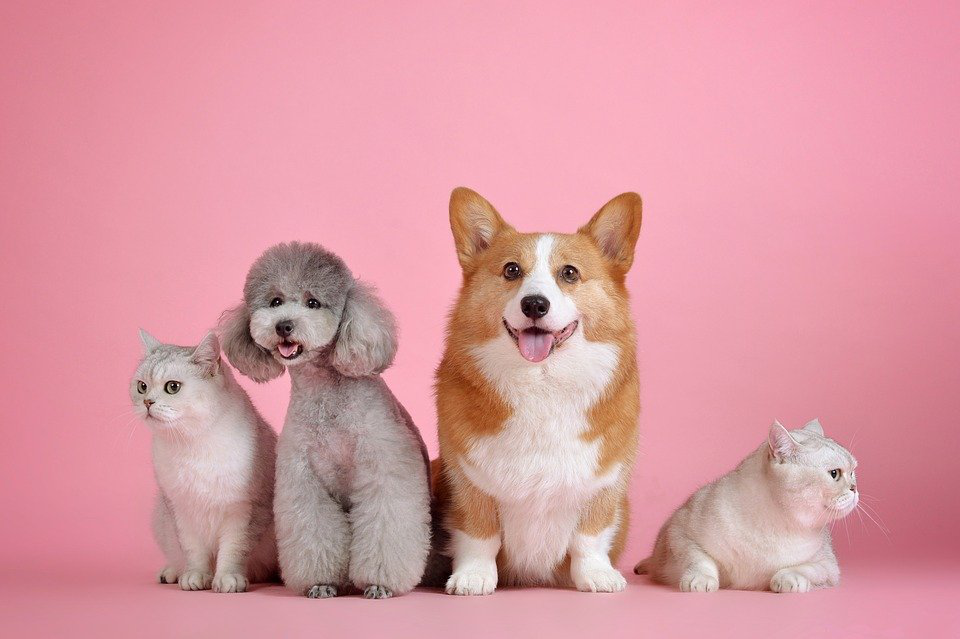

In [9]:
pic

In [10]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

In [11]:
#image -> array 
pic_arr = np.asarray(pic)

In [12]:
type(pic_arr)

numpy.ndarray

In [13]:
pic_arr.shape

(639, 960, 3)

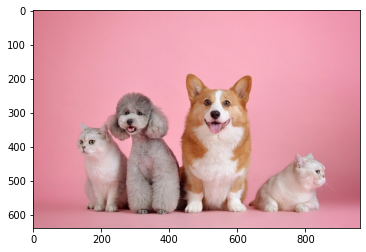

In [16]:
plt.imshow(pic_arr)
plt.show()

In [18]:
pic_copy = pic_arr.copy()

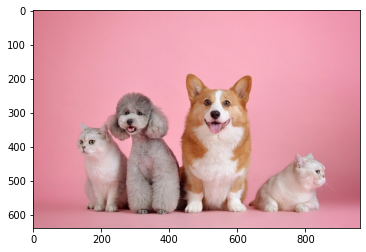

In [19]:
plt.imshow(pic_copy)
plt.show()

In [20]:
pic_copy.shape #채널 순서 (R G B:0, 1,2)

(639, 960, 3)

In [21]:
print(pic_copy[:,:,0])
print(pic_copy[:,:,0].shape)

[[215 215 215 ... 233 233 233]
 [215 215 215 ... 233 233 233]
 [215 215 215 ... 233 233 233]
 ...
 [210 211 211 ... 231 230 229]
 [210 211 211 ... 229 229 229]
 [210 211 211 ... 228 230 231]]
(639, 960)


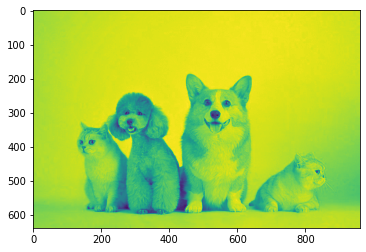

In [22]:
plt.imshow(pic_copy[:,:,0]) # Red에 대해
plt.show()

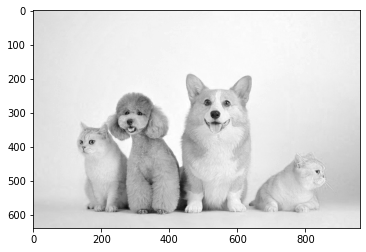

In [26]:
plt.imshow(pic_copy[:,:,0], cmap='gray')
plt.show()

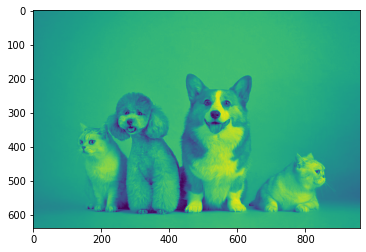

In [23]:
plt.imshow(pic_copy[:,:,1]) # Green
plt.show()

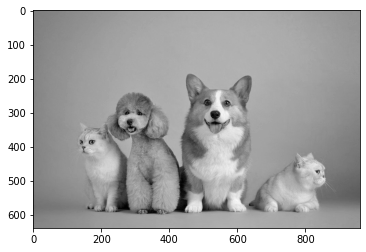

In [27]:
plt.imshow(pic_copy[:,:,1], cmap='gray')
plt.show()

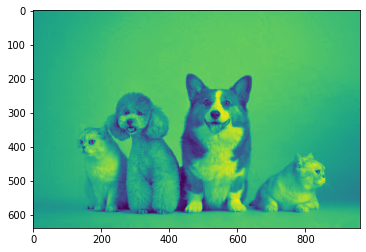

In [24]:
plt.imshow(pic_copy[:,:,2]) # Blue
plt.show()

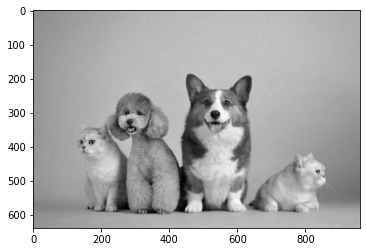

In [28]:
plt.imshow(pic_copy[:,:,2], cmap='gray') 
plt.show()

Red channel 분포확인

In [29]:
pic_red = pic_arr.copy()
pic_red[:,:,1] = 0
pic_red[:,:,2] = 0
pic_red

array([[[215,   0,   0],
        [215,   0,   0],
        [215,   0,   0],
        ...,
        [233,   0,   0],
        [233,   0,   0],
        [233,   0,   0]],

       [[215,   0,   0],
        [215,   0,   0],
        [215,   0,   0],
        ...,
        [233,   0,   0],
        [233,   0,   0],
        [233,   0,   0]],

       [[215,   0,   0],
        [215,   0,   0],
        [215,   0,   0],
        ...,
        [233,   0,   0],
        [233,   0,   0],
        [233,   0,   0]],

       ...,

       [[210,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [231,   0,   0],
        [230,   0,   0],
        [229,   0,   0]],

       [[210,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [229,   0,   0],
        [229,   0,   0],
        [229,   0,   0]],

       [[210,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [228,   0,   0],
        [230,   0,   0],
        [231,   0,   0]]

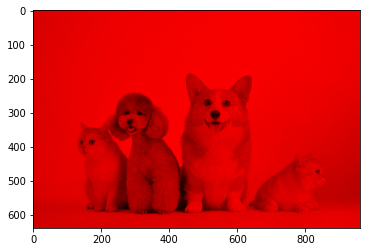

In [30]:
plt.imshow(pic_red)
plt.show()

Green channel 분포확인

In [31]:
pic_green = pic_arr.copy()
pic_green[:,:,0] = 0
pic_green[:,:,2] = 0
pic_green

array([[[  0, 124,   0],
        [  0, 124,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 145,   0],
        [  0, 145,   0]],

       [[  0, 124,   0],
        [  0, 124,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 145,   0],
        [  0, 145,   0]],

       [[  0, 124,   0],
        [  0, 124,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 145,   0],
        [  0, 145,   0]],

       ...,

       [[  0, 132,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 153,   0],
        [  0, 152,   0],
        [  0, 151,   0]],

       [[  0, 132,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 151,   0],
        [  0, 151,   0],
        [  0, 151,   0]],

       [[  0, 132,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 150,   0],
        [  0, 152,   0],
        [  0, 153,   0]]

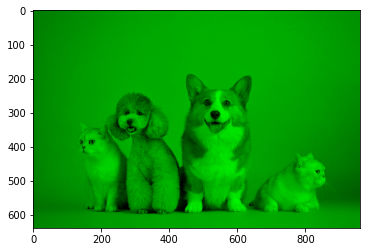

In [32]:
plt.imshow(pic_green)
plt.show()

Blue channel 분포확인

In [33]:
pic_blue = pic_arr.copy()
pic_blue[:,:,1] = 0
pic_blue[:,:,0] = 0
pic_blue

array([[[  0,   0, 141],
        [  0,   0, 141],
        [  0,   0, 141],
        ...,
        [  0,   0, 169],
        [  0,   0, 169],
        [  0,   0, 169]],

       [[  0,   0, 141],
        [  0,   0, 141],
        [  0,   0, 141],
        ...,
        [  0,   0, 169],
        [  0,   0, 169],
        [  0,   0, 169]],

       [[  0,   0, 141],
        [  0,   0, 141],
        [  0,   0, 141],
        ...,
        [  0,   0, 169],
        [  0,   0, 169],
        [  0,   0, 169]],

       ...,

       [[  0,   0, 145],
        [  0,   0, 146],
        [  0,   0, 146],
        ...,
        [  0,   0, 179],
        [  0,   0, 178],
        [  0,   0, 177]],

       [[  0,   0, 145],
        [  0,   0, 146],
        [  0,   0, 146],
        ...,
        [  0,   0, 177],
        [  0,   0, 177],
        [  0,   0, 177]],

       [[  0,   0, 145],
        [  0,   0, 146],
        [  0,   0, 146],
        ...,
        [  0,   0, 176],
        [  0,   0, 178],
        [  0,   0, 179]]

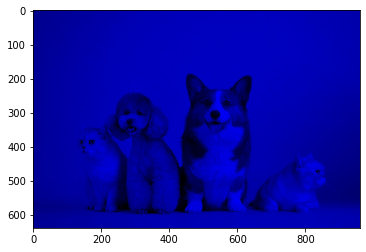

In [34]:
plt.imshow(pic_blue)
plt.show()

<h3>이미지 출력2-cv2_imshow</h3>

In [37]:
from google.colab.patches import cv2_imshow

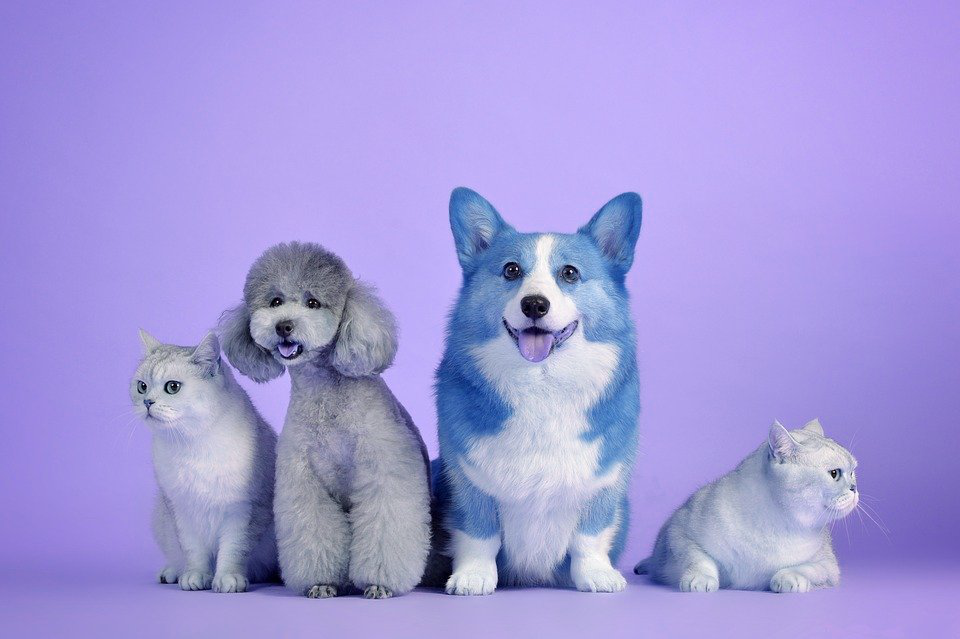

In [38]:
cv2_imshow(pic_arr)

In [ ]:
#OpenCV의 color channel 순서 B G R

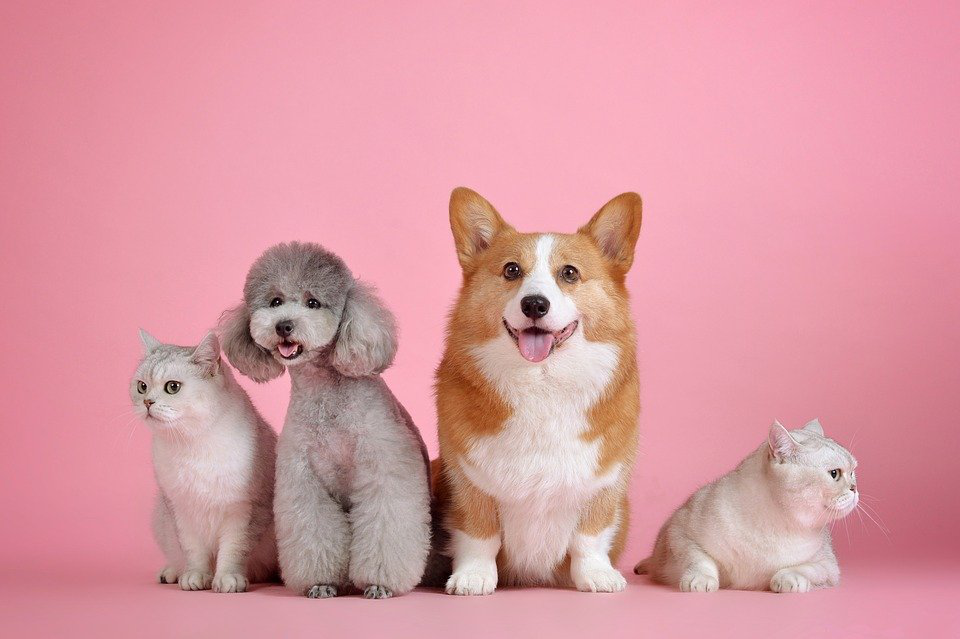

In [40]:
image = cv2.cvtColor(pic_arr, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

In [ ]:
# image, pic_arr 비교

In [42]:
print(image[0][0]),print(pic_arr[0][0]) # 실체는 그대로

[141 124 215]
[215 124 141]


(None, None)

In [43]:
#실체도 교체할 수 있다
temp_arr = pic_arr[:,:,::-1]

In [44]:
print(temp_arr[0][0]),print(pic_arr[0][0]) 

[141 124 215]
[215 124 141]


(None, None)

<h3>이미지 읽기</h3>

cv2.imread(): path, 이미지 파일의 플래그값을 인자로 넣어줌

- cv2.IMREAD_COLOR : 이미지 파일을 칼라로 읽어들이고, 투명한 부분은 무시되며, 디폴트값

- cv2.IMREAD_GRAYSCALE :이미지를 그레이스케일로 읽음, 실제 이미지 처리시 중간단계로 많이 사용

- cv2.IMREAD_UNCHANGED : 이미지 파일을 알파채널(투명도)까지 포함하여 읽어드림

(주의)
cv2.imread() 는 잘못된 경로로 읽어도 NONETYPE으로 들어갈 뿐, 오류를 발생하지않음 따라서 검증할 필요가 있음

In [45]:
from google.colab import files
files.upload()

Saving Lenna.png to Lenna.png


{'Lenna.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01J\x00\x00\x01J\x08\x06\x00\x00\x00{)\x16\x05\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\x07tIME\x07\xe1\x01\x15\x04\x19\x0e0\xda\xc0Y\x00\x00\x80\x00IDATx\xda\xc4\xfdK\x8fv[\x92\xdf\x87\xfd"b\xad\xbd\x9f\xcc\xf7rn]U\xdd$\xbb\x9bm\x89\x03Y\x86!\xd1\xa0DJ\xa2D6-\x02\xf2\x97\xb1\xbaIj\xe4\xc1\x99\xfaKxb\xc33\xc3\xf0\xd4\x02,\xc0\x86\xa1\x81\x00\x0b\x92)\x91,\xb1\xab\xba\xeeU\xa7\xea\xd4y/\x99\xf9<{\xaf\x15\x11\x1e\xc4\xca\xb7Nw\x17\xe9&M\xc1\x05\xf4\xe5\xd4y/\x99\xf9\xec\xbdV\xc4\xff*\xdf\xff\xdf\xfeo2\xd8\x81\x13\x9b7\xc4vBA\x02b\x9e\xd0&\x11\x1b\xe1\x8f\xd0vDAnO\x88:Cv\x14\xc5\xc6\x15\xd7\x97d*M\xae\xa0\x0e\\\x90\xbeavb\xda@\x1c\xcc\xb0\xdeQ\x83\xe9I\xcfI\x84\x90\xa6\xe4\xd5\xc9\x03\xce\xb7o8\xfb\'<\xbd=\xb8~\xf1\x15

In [47]:
image = cv2.imread('Lenna.png', cv2.IMREAD_UNCHANGED)

In [48]:
print(type(image))

<class 'numpy.ndarray'>


In [49]:
print(image)

[[[124 137 226 255]
  [131 137 224 255]
  [125 137 224 255]
  ...
  [124 149 233 255]
  [120 145 229 255]
  [ 96 109 207 255]]

 [[124 137 226 255]
  [131 137 224 255]
  [125 137 224 255]
  ...
  [124 148 232 255]
  [119 144 229 255]
  [ 96 108 206 255]]

 [[125 137 226 255]
  [132 137 223 255]
  [126 137 224 255]
  ...
  [126 151 235 255]
  [122 150 233 255]
  [ 98 113 212 255]]

 ...

 [[ 64  27  89 255]
  [ 60  25  88 255]
  [ 63  27  91 255]
  ...
  [ 79  64 161 255]
  [ 77  67 168 255]
  [ 77  61 164 255]]

 [[ 59  18  82 255]
  [ 58  25  90 255]
  [ 62  28  95 255]
  ...
  [ 83  69 172 255]
  [ 80  71 175 255]
  [ 79  67 177 255]]

 [[ 57  22  81 255]
  [ 60  29  91 255]
  [ 64  30  96 255]
  ...
  [ 82  70 177 255]
  [ 78  69 180 255]
  [ 82  74 184 255]]]


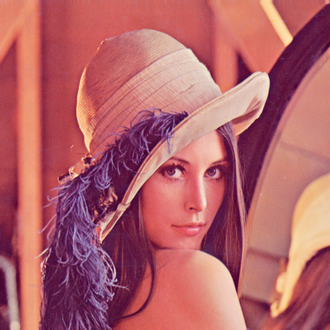

In [50]:
cv2_imshow(image)

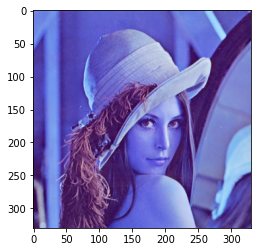

In [51]:
plt.imshow(image)
plt.show()

In [52]:
image_temp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

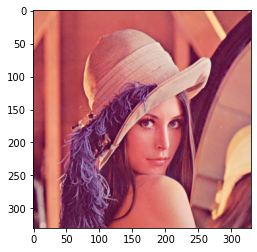

In [53]:
plt.imshow(image_temp)
plt.show()

In [54]:
img_gray = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

In [55]:
print(img_gray.shape)

(330, 330)


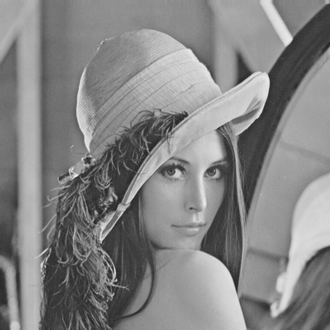

In [57]:
cv2_imshow(img_gray)

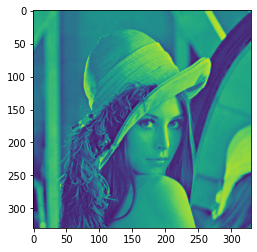

In [58]:
plt.imshow(img_gray)
plt.show()

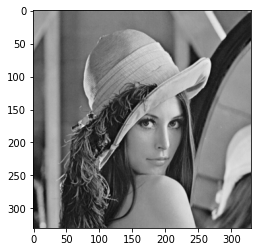

In [59]:
plt.imshow(img_gray, cmap='gray')
plt.show()

<h3>이미지 저장</h3>  

- cv2.imwrite(): 경로, 이미지 배열을 인자로 받음

In [62]:
random_image = np.random.randint(0,256, size=(200,200,3))
print(random_image.shape)

(200, 200, 3)


In [63]:
cv2.imwrite('./random_image.png', random_image)

True

In [64]:
no_img = cv2.imread('./no_image.png')

In [66]:
no_img

In [67]:
type(no_img)

NoneType

In [68]:
my_img = cv2.imread('random_image.png')

In [69]:
print(type(my_img))
print(my_img.shape)

<class 'numpy.ndarray'>
(200, 200, 3)


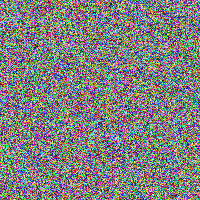

In [70]:
cv2_imshow(my_img)

컬러매핑
- 주로 gray scale, True color 이미지를 많이 활용
- 다양한 색 공간(ex. HSV, YCrCB 등)이 존재하고 이들을 변환할 수 있음
- 컬러 영상 처리에서  HSV, HSL은 같은 색 공간을 이용하여 색상 구분에 용이하고
YCrCb, YUV는 휘도 성분구분에 용이

- cv2.cvtColor() 활용

색 공간의 종류(참고)
- RGB : 컬러 표현을 빛의 3원색으로 서로 다른 비울을 통해 색 표현
- CMYK : cyan, Magenta, Yellow, Black을 기본으로 하여 주로 컬러 프린터나 인쇄시에 사용, 각 성분들의 감산에 의해 컬러 구현
- YUV : 
        Y축은 밝기성분을 U,V 두축을 이용하여 색상을 표현, 
        U축은 파란색에서 밝기 성분을 뺀 값, V축은 빨간색에서 밝기 성분을 뺀값
        아날로그 컬러신호 변환에 주로 사용 (U = B - Y), (V = R - Y)
- YCbCr :  Digital TV에서 사용하는 색공간, YPbPr이라는 아날로그 신호의 색공간을 디지털화한 것, YPbPr은 아날로그 컴포넌트 비디오에서 사용


RGB -> 디지털 컬러 영상을 획득할 때 사용
보편적으로 사용되고 있지만, 컬러 영상처리에서는 주로 사용되지 않음

HSV color space
색상(Hue), 채도(Saturation), 명도(Value)로 색을 표현
색상은 흔히 빨간색, 노란색 등과 같은 색의 종류
채도는 색의 순도, 명도는 빛의 세기,
BGR2HSV 색공간 변환할 경우,
      H: 0- 179 사이의 정수로 표현, 색상 값은 0-360로 표현하지만 uchar
        자료형은 256이상의 정수를 표현할 수 없기 때문에 OpenCV에서는 각도를 2로 나눈 값을 H로 저장
      S: 0-255사이의 정수로 표현
      V: 0-255사이의 정수로 표현

In [71]:
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

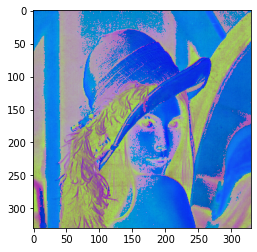

In [73]:
plt.imshow(img_hsv)
plt.show()

HSL Color Space

- 색상(Hue), 채도(Saturation), 밝기(Lightness)로 색을 표현하는 방식
- HSV와 동일하지만 밝기 요소의 차이
- " 와 더불어 사람이 실제로 칼라를 인지하는 방식과 유사

YCrCb COlor Space
Y 성분은 밝기 도는 휘도(luminance) Cr Cb성분은 색상 또는  색차를 나타냄
Cr, Cb는 오직 색상 정보만 가지고 있음, 밝기 정보X
영상을 GrayScale 정보와 색상 정보로 분리하여 처리할 때 유용
Y,Cr,Cb : 0-255사이의 정수로 표현

Line   
cv.line()
- parameters
  - img: 그림을 그릴 이미지 파잉ㄹ
  - start : 시작좌표
  - end : 종료좌표
  - color : BGR형태의 칼라
  - thickness (int) :선의 두께 

In [75]:
img =np.zeros((512,512,3), np.uint8)

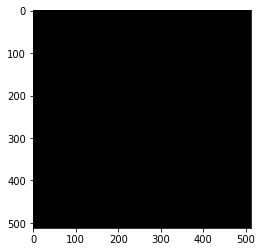

In [76]:
plt.imshow(img)
plt.show()

In [77]:
img = cv2.line(img, (0,0), (511,511), (255,0,0), 5)

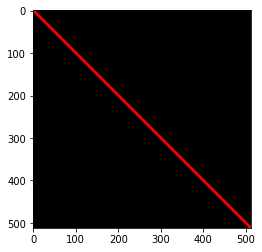

In [78]:
plt.imshow(img)
plt.show()

Rectangle       
cv.rectangle()
- parameters
  - img: 그림을 그릴 이미지 file
  - start : 시작좌표
  - end : 종료좌표
  - color : BGR형태의 칼라
  - thickness (int) :선의 두께 

In [79]:
img = cv2.rectangle(img,( 384,0), (510,128),(0,255,0),3)

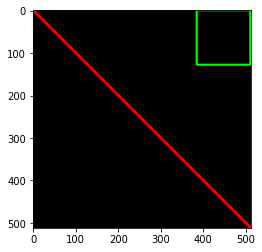

In [80]:
plt.imshow(img)
plt.show()

Circle
cv.circle()
- parameters
  - img: 그림을 그릴 이미지 파잉ㄹ
  - center : 원의 중심좌표
  - radian : 반지름
  - color : BGR형태의 칼라
  - thickness (int) :선의 두께 

In [81]:
img = cv2.circle(img, (447,63), 63, (0,0,255), -1)

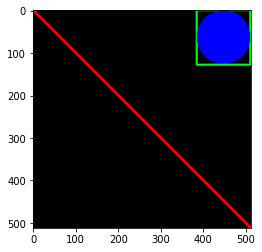

In [82]:
plt.imshow(img)
plt.show()

In [83]:
img = cv2.circle(img, (63,447), 63, (255,255,0), 2)

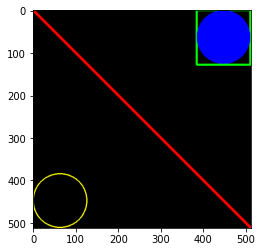

In [84]:
plt.imshow(img)
plt.show()

Circle
cv.ellipse()
- parameters
  - img: 그림을 그릴 이미지 file
  - center : 타원의 중심
  - axes : 중심에서 가장 큰 거리와 작은 거리
  - angle : 타원의 기울기 각
  - startAngle : 타원의 시작각도
  - endAngle : 타원이 끝나는 각도
  - color : BGR형태의 칼라
  - thickness (int) :선의 두께 , -1이면 안쪽을 채움

In [88]:
img = cv2.ellipse(img, (255,255),(150,30), 0, 0, 360,(0,255,0), -1)

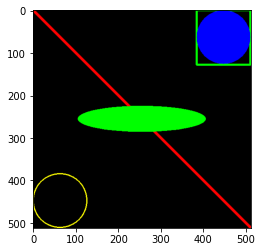

In [89]:
plt.imshow(img)
plt.show()

polygon
cv.ploylines()
- parameters
  - img: 그림을 그릴 이미지 file
  - pts (array) : 연결할 꼭지점 좌표
  - isClosed : 닫힌 도형여부
  - color : BGR형태의 칼라
  - thickness (int) :선의 두께 , -1이면 안쪽을 채움

이미지에 표현하기 위해 점 좌표를 3차원 행렬로 변환
- 변환이전과 이후의 행렬 갯수는 동일해야 함
- -1은 원본에 해당하는 값을 그대로 유지

In [91]:
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
print(pts.shape)

(4, 2)


In [92]:
pts = pts.reshape(-1,2,1)
print(pts.shape)

(4, 2, 1)


In [93]:
img = cv2. polylines(img, [pts], True, (0, 155, 255), 5)

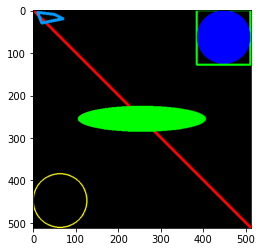

In [95]:
plt.imshow(img)
plt.show()

Add Text
cv.putText()
- parameters
  - img: 그림을 그릴 이미지 file
  - text : 표시할 문자열
  - org : 문자열이 표시될 위치, 문자열의 bottom-left corner 점
  - font : font type. CV2.FONT_XXX
  - fontScale :Font SIze
  - color : font color
  - thickness (int) :선의 두께 , -1이면 안쪽을 채움


In [96]:
img = cv2.putText(img, 'OpenCV', (10, 500), cv2.FONT_HERSHEY_COMPLEX,4,(255,255,255),3)

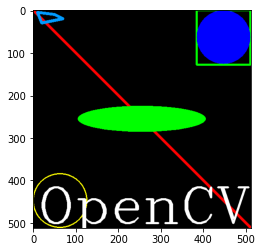

In [98]:
plt.imshow(img)
plt.show()